<a href="https://colab.research.google.com/github/mdr356/AndroidTestingMadeEasy-Unit-Test/blob/master/CNN-CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras; Convolutional Neural Network (CNN); ten-class classifier for CIFAR-10 dataset

number of data array:  [    0     1     2 ... 49997 49998 49999]
randomized number of data array [17583 25179 13899 ... 18992  1023 43138]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_20 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_21 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                               

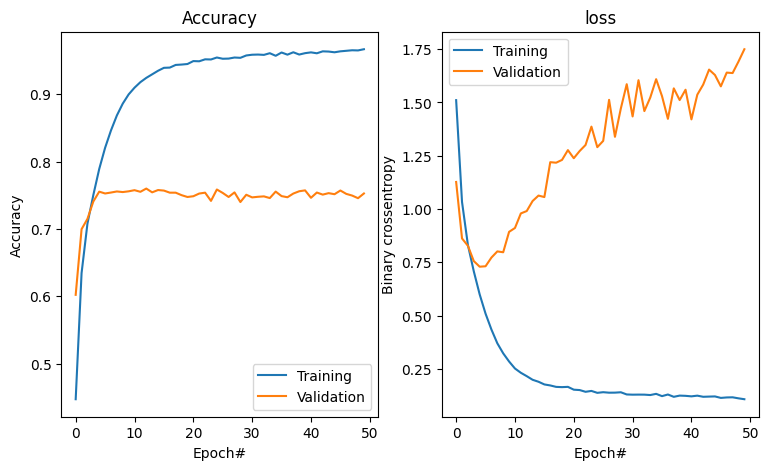

313/313 [==============================] - 1s 3ms/step - loss: 1.8373 - accuracy: 0.7500
Total loss on training set:  1.8372994661331177
Accuracy of training set:  0.75


In [7]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs = np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy_train, epochs, accuracy_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training', 'Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs, loss_train, epochs, loss_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy')
  plt.title('loss')
  plt.legend(['Training', 'Validation'])
  plt.show()


classes = np.arange(10)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# randomize the data
num_train_img = x_train.shape[0] # number of data
train_ind = np.arange(0, num_train_img) # 0 to number of data array
train_inds = np.random.permutation(train_ind) # randomized the array number of data
print('number of data array: ', train_ind)
print('randomized number of data array', train_inds)

# Shuffle the training data
x_train = x_train[train_inds,:,:,:]
y_train = y_train[train_inds]

# 20% train data for validation
x_val = x_train[0:int(0.2*num_train_img),:,:,:]
y_val = y_train[0:int(0.2*num_train_img)]

#80 % train data for training
x_train = x_train[int(0.2*num_train_img):,:,:]
y_train = y_train[int(0.2*num_train_img):]

#Scale the pixel values of the images in all the sets to a value between 0 and 1.
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

# Convert the label vectors for all the sets to binary class matrices
y_train_c = to_categorical(y_train, len(classes))
y_val_c = to_categorical(y_val, len(classes))
y_test_c = to_categorical(y_test, len(classes))

# build the model
model = Sequential()

# 2 convolutional blocks,
## 1. 2 Conv layers followed by max pooling
## 1. number of filters is 32 in the first convolutional block a
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

## 2. 2 Conv layers followed by max pooling
## 2. number of filters is 64 in the second block
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#1 flattening layer,1 FC layer with 512 nodes, and 1output layer
model.add(Flatten())
model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=len(classes)))
model.add(Activation('softmax'))
model.summary()

# Adam optimizer (Adam, learning rate of 0.001).
opt = Adam(learning_rate=0.001)
# Compile the network.
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = 'accuracy')
#create a checkpoint to save the best model base on the lower validation loss
save_path = '/content/drive/My Drive/model_assignment6.h$'
callbacks_save = ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True, save_freq='epoch')

#Train the network for 50 epochs with a batch size of 32
history = model.fit(x_train, y_train_c,
                    batch_size = 32,
                    epochs = 50,
                    validation_data = (x_val, y_val_c),
                    callbacks = [callbacks_save])

# Plot the training and validation loss for all the epochs in one plot.
plt.figure(figsize=[9,5])
acc_curve_train = np.array(history.history['accuracy'])
loss_curve_train = np.array(history.history['loss'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

# Evaluate the model on the training data samples
score = model.evaluate(x_test, y_test_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])



# # Keras; Convolutional Neural Network (CNN); ten-class classifier for CIFAR-10 dataset part2

170498071/170498071 [==============================] - 4s 0us/step
number of data array:  [    0     1     2 ... 49997 49998 49999]
randomized number of data array [44089  3811 38852 ... 33496 48374  1784]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                             

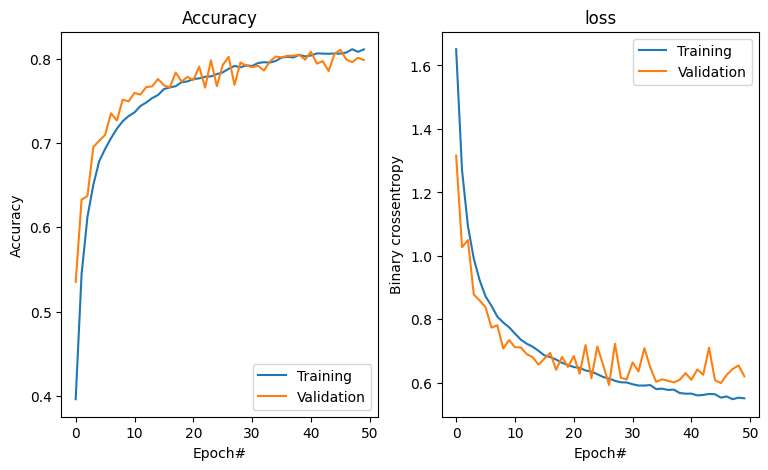

313/313 [==============================] - 1s 4ms/step - loss: 0.6089 - accuracy: 0.8021
Total loss on training set:  0.6088796257972717
Accuracy of training set:  0.8021000027656555


In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs = np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy_train, epochs, accuracy_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training', 'Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs, loss_train, epochs, loss_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy')
  plt.title('loss')
  plt.legend(['Training', 'Validation'])
  plt.show()


classes = np.arange(10)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# randomize the data
num_train_img = x_train.shape[0] # number of data
train_ind = np.arange(0, num_train_img) # 0 to number of data array
train_inds = np.random.permutation(train_ind) # randomized the array number of data
print('number of data array: ', train_ind)
print('randomized number of data array', train_inds)

# Shuffle the training data
x_train = x_train[train_inds,:,:,:]
y_train = y_train[train_inds]

# 20% train data for validation
x_val = x_train[0:int(0.2*num_train_img),:,:,:]
y_val = y_train[0:int(0.2*num_train_img)]

#80 % train data for training
x_train = x_train[int(0.2*num_train_img):,:,:]
y_train = y_train[int(0.2*num_train_img):]

#Scale the pixel values of the images in all the sets to a value between 0 and 1.
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

# Convert the label vectors for all the sets to binary class matrices
y_train_c = to_categorical(y_train, len(classes))
y_val_c = to_categorical(y_val, len(classes))
y_test_c = to_categorical(y_test, len(classes))

# build the model
model = Sequential()

# 2 convolutional blocks,
## 1. 2 Conv layers followed by max pooling
## 1. number of filters is 32 in the first convolutional block a
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

## 2. 2 Conv layers followed by max pooling
## 2. number of filters is 64 in the second block
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#1 flattening layer,1 FC layer with 512 nodes, and 1output layer
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=len(classes), activation='softmax'))
model.summary()

# Adam optimizer (Adam, learning rate of 0.001).
opt = Adam(learning_rate=0.001)
# Compile the network.
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = 'accuracy')
# Create an image data generator in Keras for real-time data augmentation.
datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True)
datagen.fit(x_train)

#create a checkpoint to save the best model base on the lower validation loss
save_path = '/content/drive/My Drive/model_assignment6.h$'
callbacks_save = ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True, save_freq='epoch')

#Train the network for 50 epochs with a batch size of 32
history = model.fit(datagen.flow(x_train, y_train_c, batch_size=32),
                                 steps_per_epoch=len(x_train) / 32, epochs=50,
                    validation_data = (x_val, y_val_c),
                    callbacks = [callbacks_save])


# Plot the training and validation loss for all the epochs in one plot.
plt.figure(figsize=[9,5])
acc_curve_train = np.array(history.history['accuracy'])
loss_curve_train = np.array(history.history['loss'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

# Evaluate the model on the training data samples
score = model.evaluate(x_test, y_test_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])


# What do you observe from the validation loss in both step (e) and (f)? Is the model overfitting or underfitting the training data? Explain

In step e, the model is overfitting after the 9th epoch, The model gives in-accurate prediction.

While step f, adding the image data augmentation, the validation from the graph shown, is giving accurate result.

# Keras; Convolutional Neural Network (CNN); ten-class classifier for CIFAR-10 dataset (BatchNormalization)
Now define another model with the same architecture in (d), except that this time you need to
add batch normalization layers to the CNN network

number of data array:  [    0     1     2 ... 49997 49998 49999]
randomized number of data array [ 4783 18806 25807 ... 42523 35079  9176]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        864       
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9216      
                                                                 
 batch_normalization_13 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                             

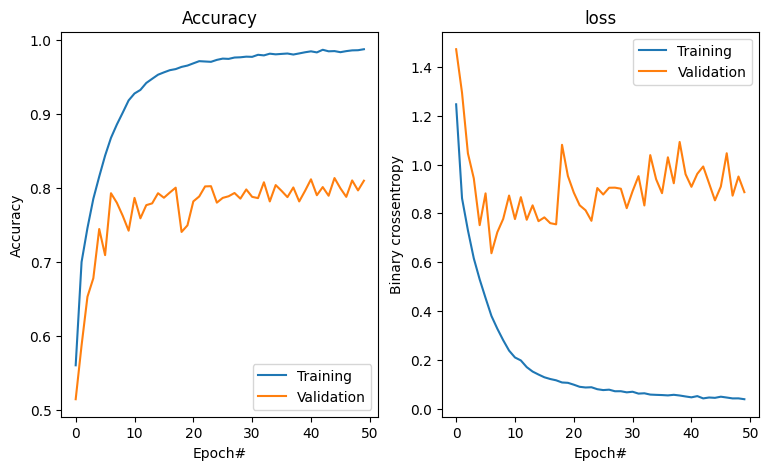

313/313 [==============================] - 1s 4ms/step - loss: 0.8895 - accuracy: 0.8028
Total loss on training set:  0.8894858360290527
Accuracy of training set:  0.8027999997138977


In [3]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs = np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy_train, epochs, accuracy_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training', 'Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs, loss_train, epochs, loss_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy')
  plt.title('loss')
  plt.legend(['Training', 'Validation'])
  plt.show()


classes = np.arange(10)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# randomize the data
num_train_img = x_train.shape[0] # number of data
train_ind = np.arange(0, num_train_img) # 0 to number of data array
train_inds = np.random.permutation(train_ind) # randomized the array number of data
print('number of data array: ', train_ind)
print('randomized number of data array', train_inds)

# Shuffle the training data
x_train = x_train[train_inds,:,:,:]
y_train = y_train[train_inds]

# 20% train data for validation
x_val = x_train[0:int(0.2*num_train_img),:,:,:]
y_val = y_train[0:int(0.2*num_train_img)]

#80 % train data for training
x_train = x_train[int(0.2*num_train_img):,:,:]
y_train = y_train[int(0.2*num_train_img):]

#Scale the pixel values of the images in all the sets to a value between 0 and 1.
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

# Convert the label vectors for all the sets to binary class matrices
y_train_c = to_categorical(y_train, len(classes))
y_val_c = to_categorical(y_val, len(classes))
y_test_c = to_categorical(y_test, len(classes))

# build the model
model = Sequential()

# 2 convolutional blocks,
## 1. 2 Conv layers followed by max pooling
## 1. number of filters is 32 in the first convolutional block a
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 input_shape=x_train.shape[1:], use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

## 2. 2 Conv layers followed by max pooling
## 2. number of filters is 64 in the second block
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 input_shape=x_train.shape[1:], use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#1 flattening layer,1 FC layer with 512 nodes, and 1output layer
model.add(Flatten())
model.add(Dense(units=512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=len(classes)))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.summary()

# Adam optimizer (Adam, learning rate of 0.01).
opt = Adam(learning_rate=0.01)
# Compile the network.
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = 'accuracy')
#create a checkpoint to save the best model base on the lower validation loss
save_path = '/content/drive/My Drive/model_assignment6-batchnormalization.h$'
callbacks_save = ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True, save_freq='epoch')

#Train the network for 50 epochs with a batch size of 64
history = model.fit(x_train, y_train_c,
                    batch_size = 64,
                    epochs = 50,
                    validation_data = (x_val, y_val_c),
                    callbacks = [callbacks_save])

# Plot the training and validation loss for all the epochs in one plot.
plt.figure(figsize=[9,5])
acc_curve_train = np.array(history.history['accuracy'])
loss_curve_train = np.array(history.history['loss'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

# Evaluate the model on the training data samples
score = model.evaluate(x_test, y_test_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])



# What do you observe from the training loss in both steps (e) and (h)?
In step e the model is overfitted, while in step h, the model is not overfitted. We have faster convergence, since the batch size is bigger.